In [2]:
import pandas as pd
import numpy as np
from math import log
from matplotlib import pyplot as plt


### TF-IDF 실습

In [6]:
docs = [
  'I like a red apple',
  'the color of the banana is yellow',
  'long and yellow sweet banana',
  'I like fruits. especially apple and banana'
]
vocab = list(set(w for doc in docs for w in doc.split()))
vocab

['the',
 'especially',
 'and',
 'apple',
 'fruits.',
 'I',
 'red',
 'of',
 'long',
 'sweet',
 'a',
 'is',
 'color',
 'banana',
 'yellow',
 'like']

In [5]:
N = len(docs)

def tf(t, d):
    words_set = d.split(' ')
    return words_set.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

TF table 구하기

In [7]:
result = []

for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t, d))

tf_df = pd.DataFrame(result, columns = vocab)
tf_df

,the,especially,and,apple,fruits.,I,red,of,long,sweet,a,is,color,banana,yellow,like
0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1
1,2,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0
2,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0
3,0,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1


IDF table 구하기

In [8]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_df = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_df

,IDF
the,0.693147
especially,0.693147
and,0.287682
apple,0.287682
fruits.,0.693147
I,0.287682
red,0.693147
of,0.693147
long,0.693147
sweet,0.693147


TF-IDF 테이블 구하기

In [9]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_df = pd.DataFrame(result, columns = vocab)
tfidf_df

,the,especially,and,apple,fruits.,I,red,of,long,sweet,a,is,color,banana,yellow,like
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.287682,0.693147,0.000000,0.000000,0.000000,-0.223144,0.000000,0.000000,0.0,0.000000,0.287682
1,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,-0.000000,0.693147,0.693147,0.0,0.287682,0.000000
2,0.000000,0.000000,0.287682,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,-0.000000,0.000000,0.000000,0.0,0.287682,0.000000
3,0.000000,0.693147,0.287682,0.287682,0.693147,0.287682,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.0,0.000000,0.287682


## 라이브러리를 사용해 벡터화 하기

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

docs = [
  'I like a red apple',
  'the color of the banana is yellow',
  'long and yellow sweet banana',
  'I like fruit especially apples and bananas'
]

vector = CountVectorizer()

print(vector.fit_transform(docs).toarray())
print(vector.vocabulary_)

tfidfv = TfidfVectorizer().fit(docs)
print(tfidfv.transform(docs).toarray())
rfidf_arr = tfidfv.transform(docs).toarray()
rfidf_arr

[[0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 1 0 1 0 0 1 0 0 1 0 0 2 1]
 [1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1]
 [1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0]]
{'like': 9, 'red': 12, 'apple': 1, 'the': 14, 'color': 5, 'of': 11, 'banana': 3, 'is': 8, 'yellow': 15, 'long': 10, 'and': 0, 'sweet': 13, 'fruit': 7, 'especially': 6, 'apples': 2, 'bananas': 4}
[[0.         0.61761437 0.         0.         0.         0.
  0.         0.         0.         0.48693426 0.         0.
  0.61761437 0.         0.         0.        ]
 [0.         0.         0.         0.27460308 0.         0.34829919
  0.         0.         0.34829919 0.         0.         0.34829919
  0.         0.         0.69659839 0.27460308]
 [0.40104275 0.         0.         0.40104275 0.         0.
  0.         0.         0.         0.         0.50867187 0.
  0.         0.50867187 0.         0.40104275]
 [0.34431452 0.         0.43671931 0.         0.43671931 0.
  0.43671931 0.43671931 0.         0.34431452 0.         0.
  0.         0.         0. 

array([[0.        , 0.61761437, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.48693426,
        0.        , 0.        , 0.61761437, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.27460308, 0.        ,
        0.34829919, 0.        , 0.        , 0.34829919, 0.        ,
        0.        , 0.34829919, 0.        , 0.        , 0.69659839,
        0.27460308],
       [0.40104275, 0.        , 0.        , 0.40104275, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.50867187, 0.        , 0.        , 0.50867187, 0.        ,
        0.40104275],
       [0.34431452, 0.        , 0.43671931, 0.        , 0.43671931,
        0.        , 0.43671931, 0.43671931, 0.        , 0.34431452,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

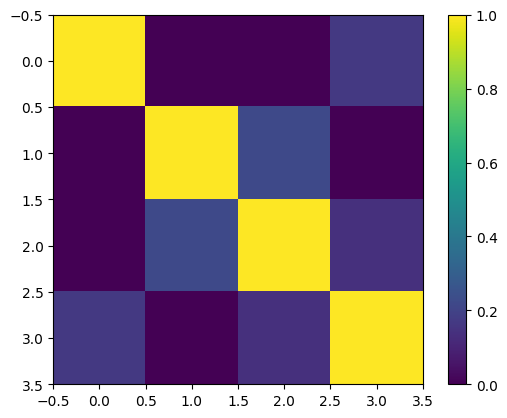

array([[1.        , 0.        , 0.        , 0.16765854],
       [0.        , 1.        , 0.22025515, 0.        ],
       [0.        , 0.22025515, 1.        , 0.13808484],
       [0.16765854, 0.        , 0.13808484, 1.        ]])

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

cos_matrix = cosine_similarity(rfidf_arr, rfidf_arr)
plt.imshow(cos_matrix)
plt.colorbar()
plt.show()
cos_matrix

In [ ]:
docs = [
  'I like a red apple',
  'the color of the banana is yellow',
  'long and yellow sweet banana',
  'I like fruits. especially apple and banana'
]

In [13]:
my_index = 1
sim_sorted_idx_arr = np.argsort(cos_matrix[my_index], axis=0)[::-1]
sim_sorted_idx_arr

array([1, 2, 3, 0])

### 문장의 유사도를 사용해 추천 시스템 구현하기

Dataset : https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

In [14]:
movies_df = pd.read_csv('kaggle_movie/movies_metadata.csv', low_memory=False)[['id', 'title', 'overview']]
movies_df

FileNotFoundError: [Errno 2] No such file or directory: 'kaggle_movie/movies_metadata.csv'

데이터 검사

In [15]:
movies_df.isna().sum()

NameError: name 'movies_df' is not defined

In [ ]:
movies_df = movies_df.dropna()
movies_df = movies_df.drop_duplicates()
print(movies_df.nunique())
movies_df

id          44476
title       41371
overview    44303
dtype: int64


,id,title,overview
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...,...
45461,439050,Subdue,Rising and falling between a man and woman.
45462,111109,Century of Birthing,An artist struggles to finish his work while a...
45463,67758,Betrayal,"When one of her hits goes wrong, a professiona..."
45464,227506,Satan Triumphant,"In a small town live two brothers, one a minis..."


문장 벡터화

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(movies_df['overview'])
tfidf_matrix

<44476x75827 sparse matrix of type '<class 'numpy.float64'>'
	with 1209924 stored elements in Compressed Sparse Row format>

유사도 계산

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cos_sim_df = pd.DataFrame(cosine_sim, index = movies_df.id , columns=movies_df.id)
cos_sim_df

id,862,8844,15602,31357,11862,949,11860,45325,9091,710,...,84419,390959,289923,222848,30840,439050,111109,67758,227506,461257
id,,,,,,,,,,,,,,,,,,,,,
862,1.000000,0.015018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.005932,0.000000
8844,0.015018,1.000000,0.046783,0.000000,0.000000,0.050108,0.000000,0.000000,0.102366,0.000000,...,0.0,0.0,0.0,0.011236,0.0,0.000000,0.066892,0.0,0.021952,0.009248
15602,0.000000,0.046783,1.000000,0.000000,0.025065,0.000000,0.000000,0.006362,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.014011,0.000000
31357,0.000000,0.000000,0.000000,1.000000,0.000000,0.007148,0.000000,0.008905,0.000000,0.000000,...,0.0,0.0,0.0,0.021475,0.0,0.026266,0.000000,0.0,0.009491,0.016356
11862,0.000000,0.000000,0.025065,0.000000,1.000000,0.000000,0.030204,0.000000,0.032661,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.006975,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,0.000000,0.000000,0.000000,0.026266,0.000000,0.025293,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000
111109,0.000000,0.066892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049829,...,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000
67758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038264,0.000000,...,0.0,0.0,0.0,0.031415,0.0,0.000000,0.000000,1.0,0.000000,0.000000


원하는 결과 출력

In [ ]:
q_movie_name = 'Toy Story'
q_movie_id = movies_df[movies_df['title'] == q_movie_name].id
print(q_movie_id)
top_10_movies = cos_sim_df[q_movie_id]
#[Ex] top_10_movie list를 뽑아보세요

In [ ]:
movies_df[movies_df['id'] == '10193']

,id,title,overview
15348,10193,Toy Story 3,"Woody, Buzz, and the rest of Andy's toys haven..."


In [ ]:
top_10_movies.index

Index(['862', '10193', '863', '6957', '82424', '92848', '181801', '364123',
       '250434', '355984'],
      dtype='object', name='id')

In [ ]:
for i, movie_idx in enumerate(top_10_movies.index):
    movie_title = movies_df[movies_df['id'] == movie_idx]['title'].values[0]
    movie_overview = movies_df[movies_df['id'] == movie_idx]['overview'].values[0]

    print(f'{i} : {movie_title} - {movie_overview}\n')